In [2]:
import numpy as np
from scipy import signal
import pywt

import sys
sys.path.append('..')
from ekg.audicor_reader import reader

import matplotlib.pyplot as plt

%matplotlib inline

In [133]:
def plot_hs_wavelet(ekg, hss, fs):
    fig, axes = plt.subplots(len(hss)*2 + 1, 1, figsize=(30, (len(hss)*2+1)*3), sharex=True)
    
    # plot ekg
    axes[0].plot(ekg)
    axes[0].margins(x=0, y=0)
    axes[0].set_title('Second Lead EKG')
    
    # plot hs and wavelet 
    for i, hs in enumerate(hss):
        raw_ax = axes[1 + i*2]
        wavelet_ax = axes[1 + i*2 + 1]
        
        raw_ax.plot(hs)
        raw_ax.margins(x=0, y=0)
        raw_ax.set_title('Heart Sound {}'.format(i))
        
        scale = np.arange(25) * (fs / 1000) + (fs / 1000) * 8
        
        coef, freqs = pywt.cwt(hs, scale, 'cgau5', sampling_period=1/fs)
        print(coef.shape, freqs[:5], '...', freqs[-5:])
        
        wavelet_ax.pcolormesh(np.arange(coef.shape[1]), freqs, abs(coef))
        wavelet_ax.set_ylabel("Hz")
        wavelet_ax.margins(x=0, y=0)
        wavelet_ax.set_title('Wavelet of Heart Sound {}'.format(i))
    
    plt.show()

(25, 5000) [75.         66.66666667 60.         54.54545455 50.        ] ... [21.42857143 20.68965517 20.         19.35483871 18.75      ]


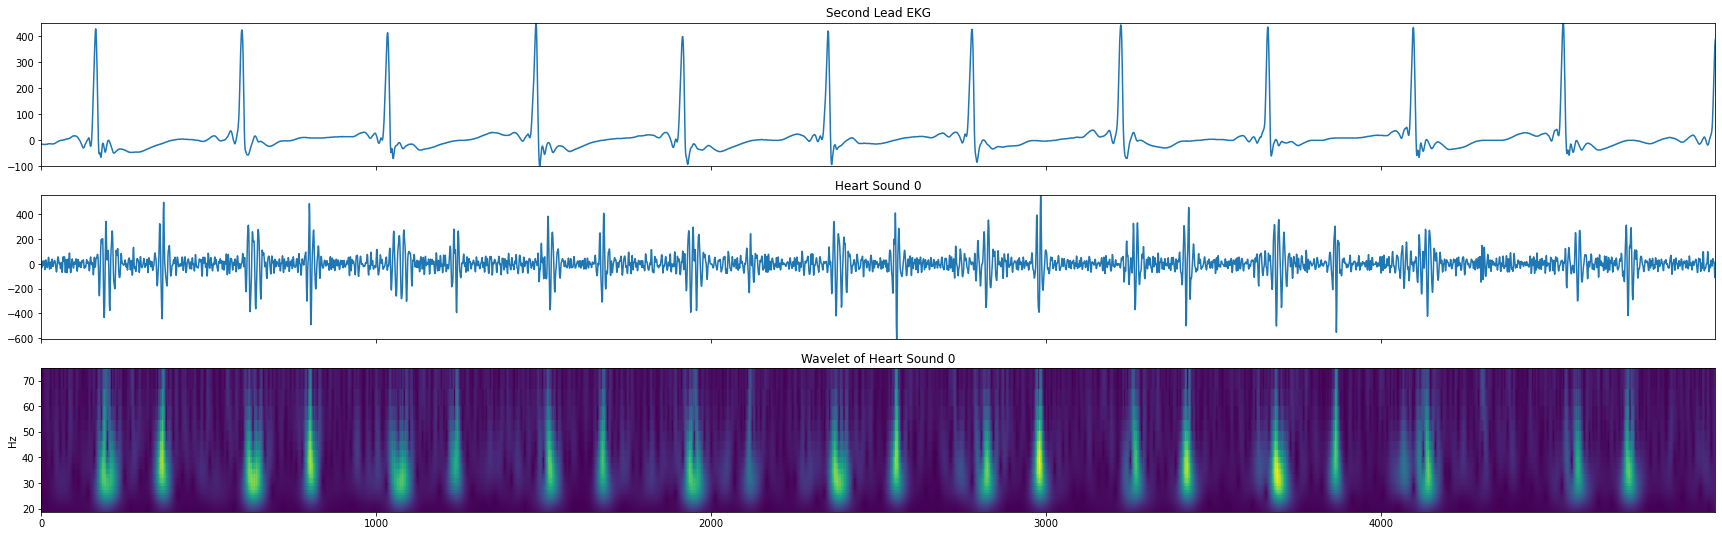

In [134]:
X = np.load('../data/audicor_10s/abnormal_X.npy')
signal = X[43, :]
plot_hs_wavelet(signal[0], signal[1:], 500)

(25, 10000) [75.         66.66666667 60.         54.54545455 50.        ] ... [21.42857143 20.68965517 20.         19.35483871 18.75      ]
(25, 10000) [75.         66.66666667 60.         54.54545455 50.        ] ... [21.42857143 20.68965517 20.         19.35483871 18.75      ]


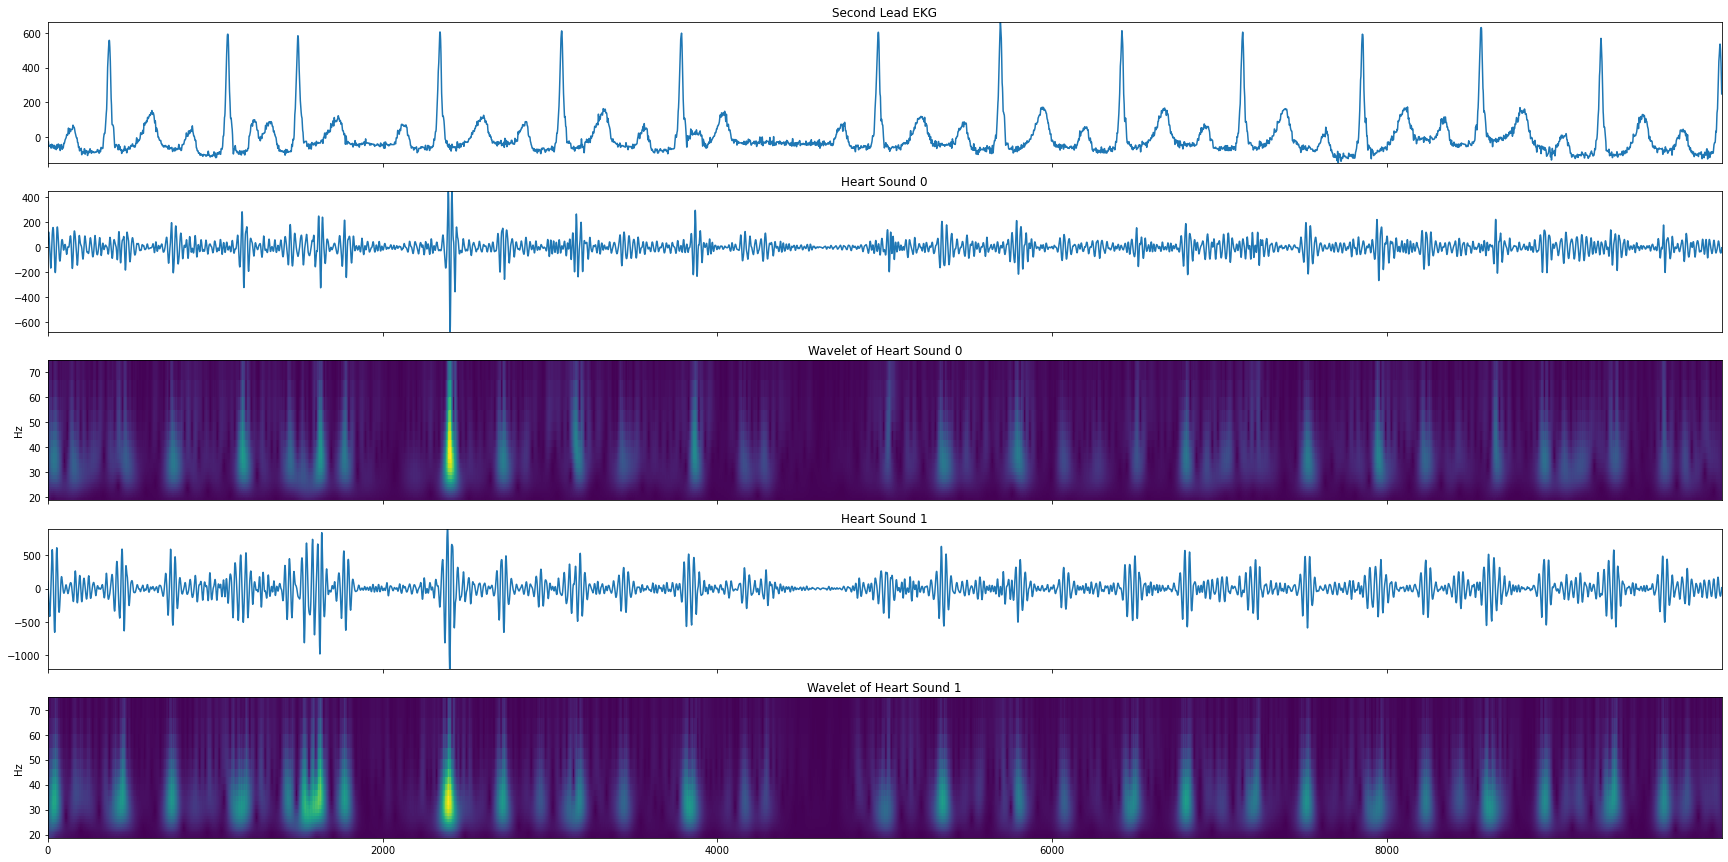

In [135]:
signal, sampling_rate = reader.get_ekg('/home/toosyou/Cardiology/TVGS/交大數據心衰遠距教學/大檢查audicor/AHF088/AH042209/PP-01_000522.bin',
                                        do_bandpass_filter=True, filter_lowcut=30, filter_highcut=120)
plot_hs_wavelet(signal[1], signal[8:10], 1000)

(25, 10000) [75.         66.66666667 60.         54.54545455 50.        ] ... [21.42857143 20.68965517 20.         19.35483871 18.75      ]
(25, 10000) [75.         66.66666667 60.         54.54545455 50.        ] ... [21.42857143 20.68965517 20.         19.35483871 18.75      ]


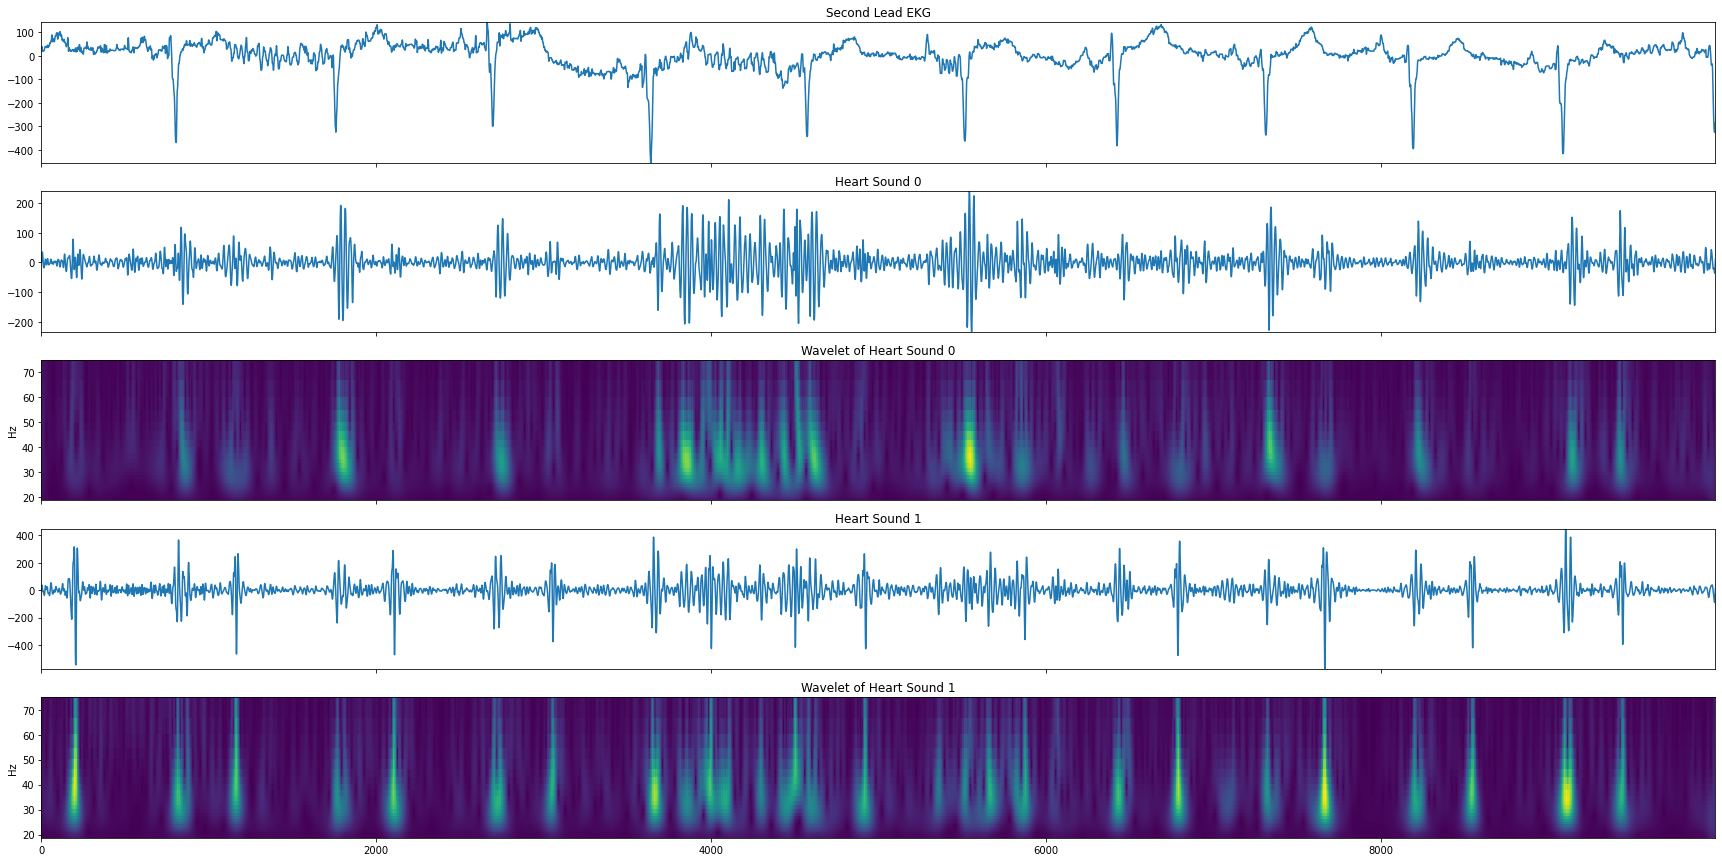

In [136]:
signal, sampling_rate = reader.get_ekg('/home/toosyou/Cardiology/TVGS/交大數據心衰遠距教學/大檢查audicor/AHF054/A032108B/PP-01_000186.bin',
                                        do_bandpass_filter=True, filter_lowcut=30, filter_highcut=120)
plot_hs_wavelet(signal[1], signal[8:10], 1000)

In [28]:
signal.shape

(10, 10000)

In [34]:
sig = signal[9, :]

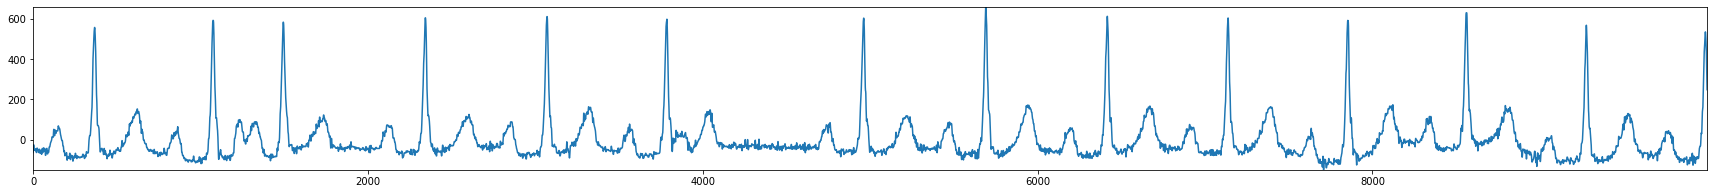

In [35]:
plt.figure(figsize=(30, 3))
plt.plot(signal[1, :])
plt.margins(x=0, y=0)

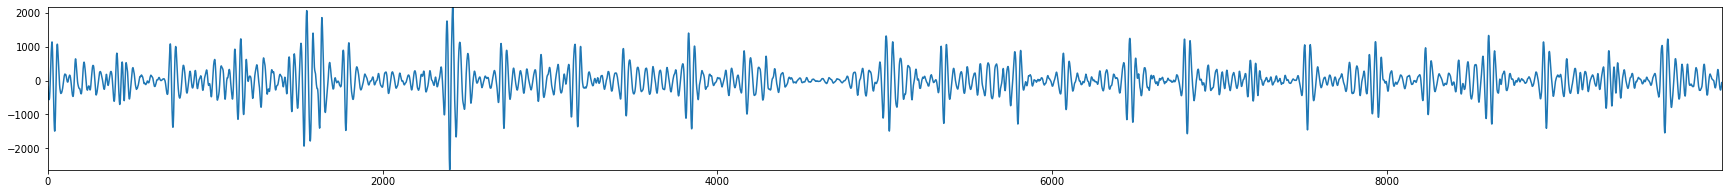

In [36]:
plt.figure(figsize=(30, 3))
plt.plot(sig)
plt.margins(x=0, y=0)

In [37]:
coef, freqs = pywt.cwt(sig, np.arange(1, 45, 1), 'cgau5', sampling_period=1/1000)

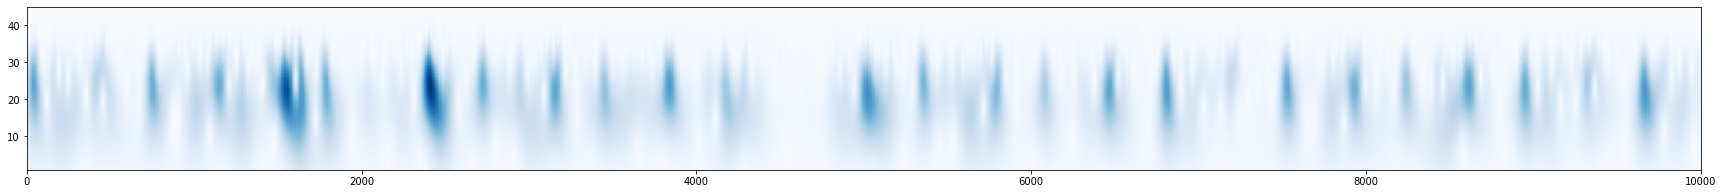

In [38]:
plt.figure(figsize=(30, 3))
plt.imshow(np.abs(coef), aspect='auto', cmap='Blues', extent=[0, 10000, 1, 45])
plt.show()

[600.         300.         200.         150.         120.
 100.          85.71428571  75.          66.66666667  60.
  54.54545455  50.          46.15384615  42.85714286  40.
  37.5         35.29411765  33.33333333  31.57894737  30.
  28.57142857  27.27272727  26.08695652  25.          24.
  23.07692308  22.22222222  21.42857143  20.68965517  20.
  19.35483871  18.75        18.18181818  17.64705882  17.14285714
  16.66666667  16.21621622  15.78947368  15.38461538  15.
  14.63414634  14.28571429  13.95348837  13.63636364]


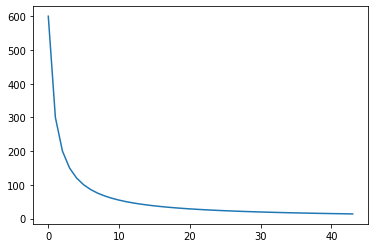

In [84]:
plt.plot(freqs)
print(freqs)

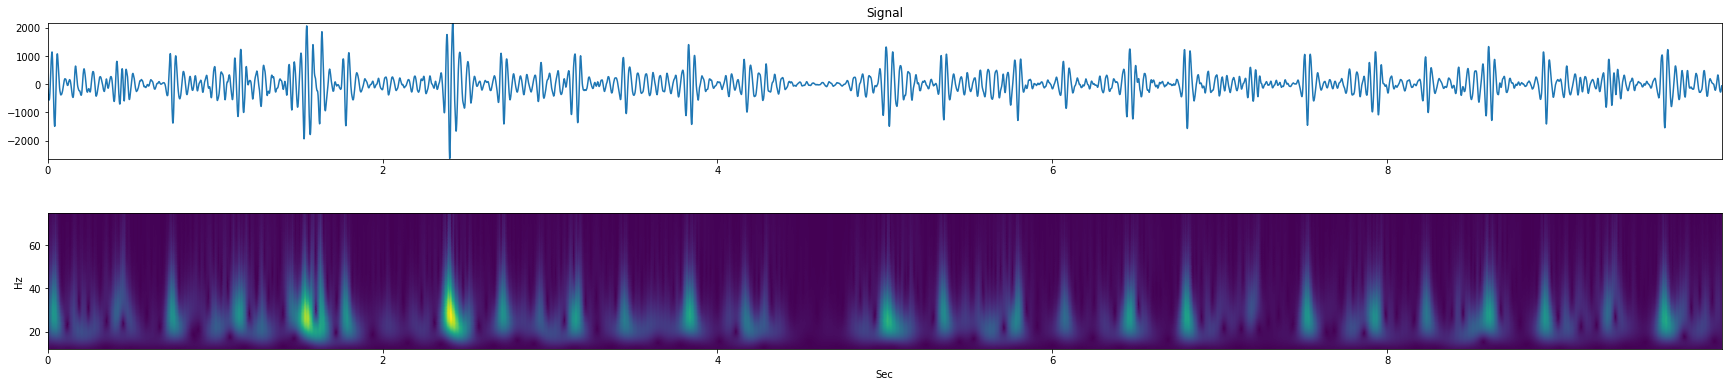

In [39]:
t = np.arange(0, 10, 1.0 / 1000)

data = sig
wavename = 'cgau5'
# totalscal = 50
# fc = pywt.central_frequency(wavename)
# cparam = 2 * fc * totalscal
# scales = cparam / np.arange(totalscal, 1, -1)

scales = np.arange(8, 50, 0.1)
[cwtmatr, frequencies] = pywt.cwt(data, scales, wavename, 1.0 / 1000)

plt.figure(figsize=(30, 6))
plt.subplot(211)
plt.plot(t, data)
plt.title("Signal")
plt.margins(x=0, y=0)

plt.subplot(212)
plt.pcolormesh(t, frequencies, abs(cwtmatr))
plt.ylabel("Hz")
plt.xlabel("Sec")
plt.subplots_adjust(hspace=0.4)
plt.margins(x=0, y=0)

plt.show()